In [105]:
"""
Random Forest Regression on Advertising Data

This notebook trains a Random Forest Regressor to predict sales based on advertising spend.
Includes:
- Train/Validation/Holdout split
- Feature scaling
- Model training and evaluation
- Exporting trained model and scaler using joblib
"""

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_error, median_absolute_error,
    explained_variance_score, accuracy_score,
    ConfusionMatrixDisplay, confusion_matrix
)


In [106]:
df = pd.read_csv('/mnt/mls/data/udemy/Advertising.csv')

In [107]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [108]:
X = df.drop('sales', axis=1)
y = df['sales']

# Train / Validation / Hold Out Test

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X_val, X_holdout, y_val, y_holdout = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [111]:
len(X_train), len(X_test), len(X_val), len(X_holdout)

(134, 66, 33, 33)

# Scaling

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Model Training

In [113]:
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [114]:
validation_predictions = model.predict(scaler.transform(X_val))

In [115]:
validation_predictions

array([12.63      , 12.62      , 22.15666667, 10.2       , 15.63333333,
        8.86      , 22.67      , 15.57666667, 11.2       , 20.44666667,
        5.04666667,  9.78333333, 11.75333333, 22.05      , 13.40666667,
       20.32666667,  5.64      ,  7.79      , 20.02666667,  6.21      ,
       22.10333333, 11.47333333,  8.88      , 10.52333333, 11.05333333,
       24.79666667, 12.73666667, 20.13666667, 14.65333333,  9.57666667,
       10.61333333, 10.44666667, 12.71333333])

In [116]:
mean_absolute_error(y_val, validation_predictions)

0.6101010101010099

In [117]:
mean_squared_error(y_val, validation_predictions)

0.4817286195286191

In [118]:
np.sqrt(mean_squared_error(y_val, validation_predictions))

0.6940667255593075

In [119]:
df.describe()['sales']

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

# Final Performance Metrics (Holdout Set)

In [120]:
holdout_predictions = model.predict(scaler.transform(X_holdout))

In [121]:
mean_absolute_error(y_holdout, holdout_predictions)  # mean

0.5773737373737373

In [122]:
mean_squared_error(y_holdout, holdout_predictions) ** 0.5  # root mean squared error

0.7399845298228228

In [123]:
final_model = RandomForestRegressor(n_estimators=30, random_state=42)

In [124]:
final_model.fit(scaler.transform(X), y)

RandomForestRegressor(n_estimators=30, random_state=42)

In [125]:
import joblib

In [126]:
joblib.dump(final_model, '/mnt/mls/models/sklearn/sales_predictor.pkl')

['/mnt/mls/models/sklearn/sales_predictor.pkl']

In [127]:
list(X.columns)

['TV', 'radio', 'newspaper']

In [128]:
joblib.dump(scaler, '/mnt/mls/models/sklearn/sales_predictor_cols.pkl')

['/mnt/mls/models/sklearn/sales_predictor_cols.pkl']

# Loading the model and columns

In [129]:
new_cols = joblib.load('/mnt/mls/models/sklearn/sales_predictor_cols.pkl')
load_model = joblib.load('/mnt/mls/models/sklearn/sales_predictor.pkl')

In [130]:
load_model.predict([[10, 20, 30]])

array([26.28333333])

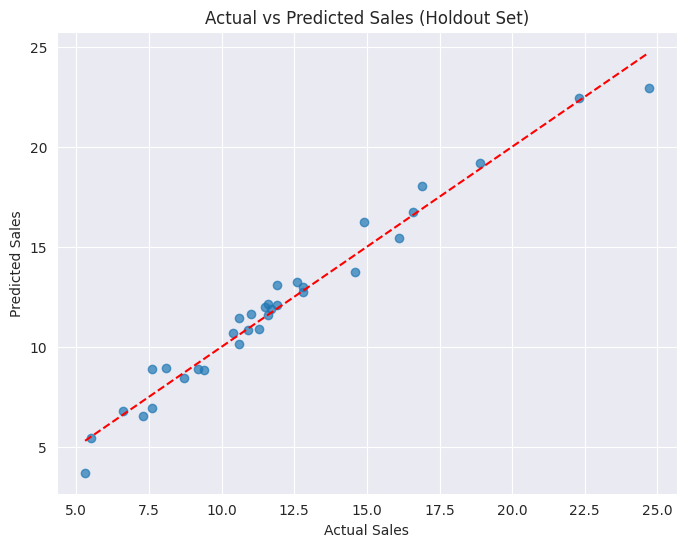

In [131]:
# After generating holdout predictions:
plt.figure(figsize=(8,6))
plt.scatter(y_holdout, holdout_predictions, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Holdout Set)')
plt.plot([y_holdout.min(), y_holdout.max()], [y_holdout.min(), y_holdout.max()], 'r--')
plt.grid(True)
plt.show()
